## Oasis Infobyte Task 1

### Iris Flower Classification

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

Reading the Dataset

In [ ]:
#reading the iris dataset
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Data Visualization

In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.shape

(150, 6)

In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


This is an unsupervised machine learning so we have to drop the 2 columns Id and Species.

In [ ]:
iris=pd.DataFrame(df)
iris_df=iris.drop(columns=["Id", "Species"])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Finding the optimum number of clusters

Elbow Method is a visual approach used to determine the ideal 'K' (number of clusters) in K-means clustering. It operates by calculating the Within-Cluster Sum of Squares (WCSS), which is the total of the squared distances between data points and their cluster center.

In [ ]:
# Initialize the list
within_cluster_sum_of_squares = []
# Calculate the within-cluster sum of squares for different k values
cluster_range = range(1, 15)
for k in cluster_range:
  km = KMeans(n_clusters=k)
  km.fit(iris_df)
  within_cluster_sum_of_squares.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Plotting the wcss against clusters range

<ipython-input-13-0dac647b4a49>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(cluster_range, within_cluster_sum_of_squares, 'go--',color='green')


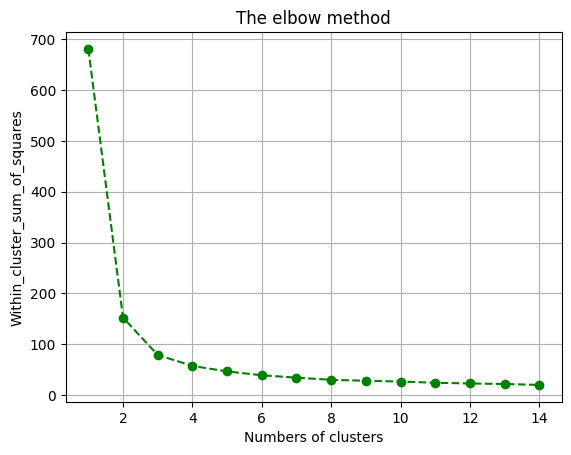

In [ ]:
plt.plot(cluster_range, within_cluster_sum_of_squares, 'go--',color='green')
plt.title("The elbow method")
plt.xlabel("Numbers of clusters")
plt.ylabel("Within_cluster_sum_of_squares")
plt.grid()
plt.show()

Applying K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3, init='k-means++',max_iter=300,n_init=10, random_state=0)
predictions=model.fit_predict(iris_df)

Visualising the clusters

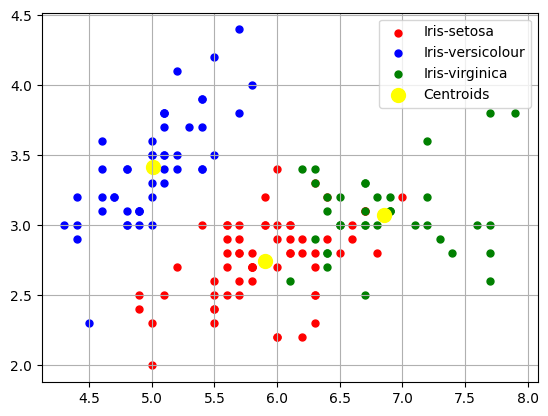

In [ ]:
x=iris_df.iloc[:, [0,1,2,3]].values
plt.scatter(x[predictions==0,0],x [predictions==0,1], s=25, c='red', label='Iris-setosa')
plt.scatter(x[predictions==1,0],x [predictions==1,1],s=25, c='blue', label='Iris-versicolour')
plt.scatter(x[predictions==2,0], x[predictions==2,1],s=25, c='green', label='Iris-virginica')
#plotting the cluster's center
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=100,c='yellow', label='Centroids')
plt.legend()
plt.grid()
plt.show()

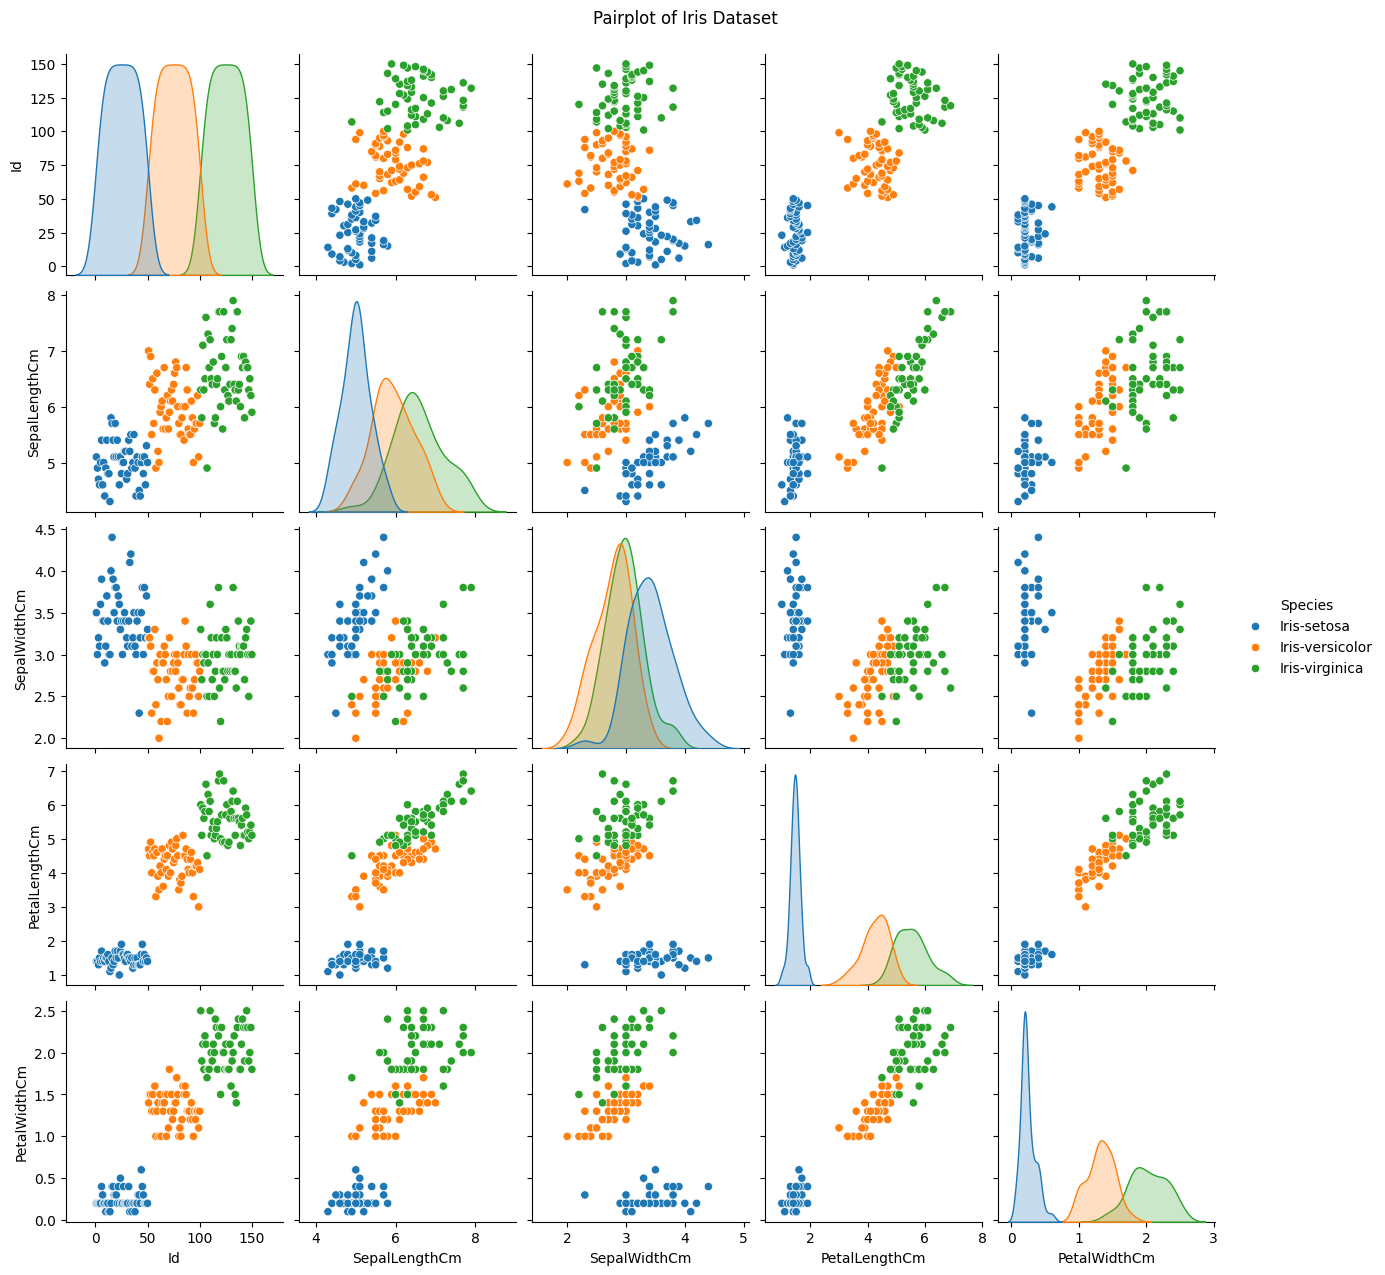

In [ ]:
sns.pairplot(df, hue='Species')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

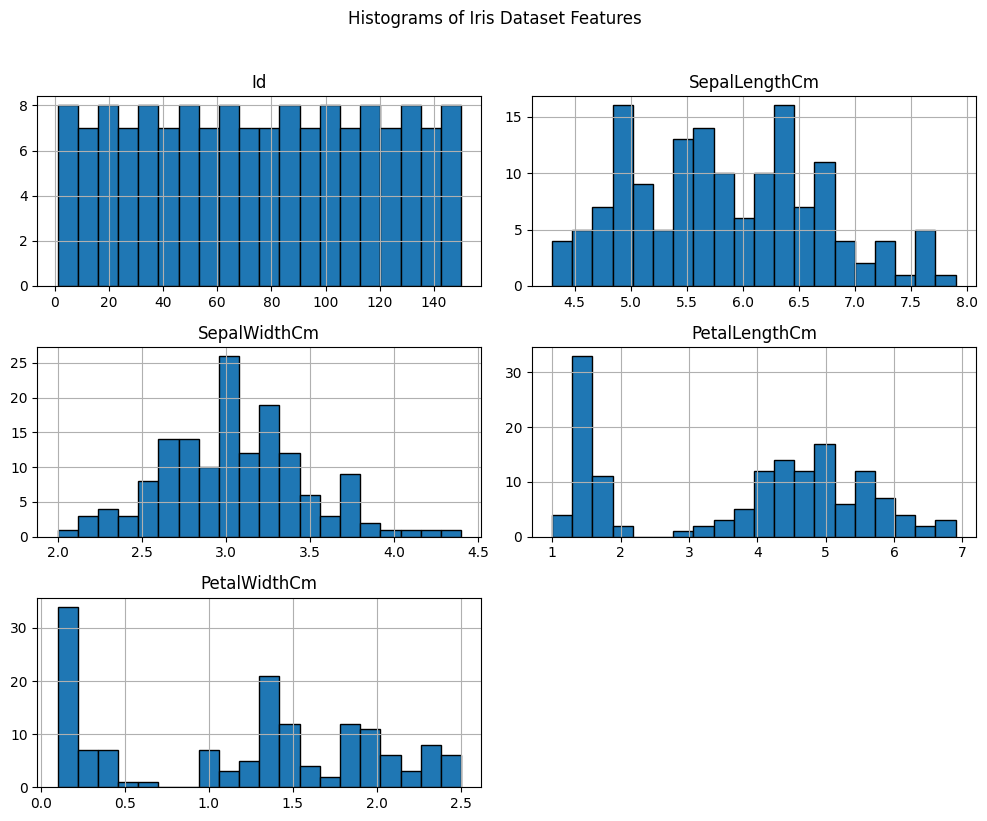

In [ ]:
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Iris Dataset Features", y=1.02)
plt.tight_layout()
plt.show()

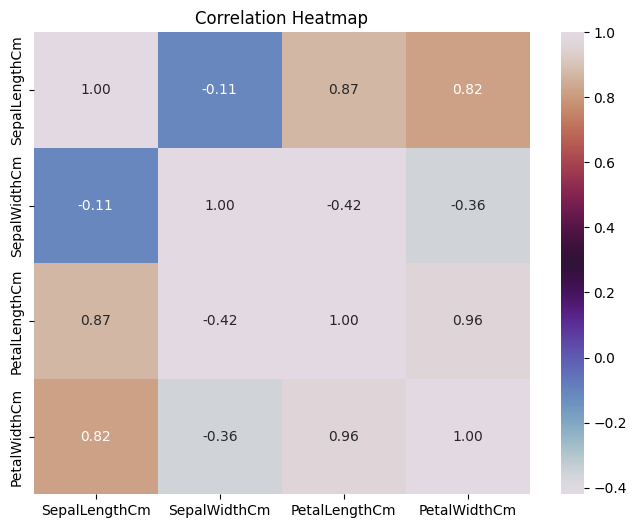

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap='twilight', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

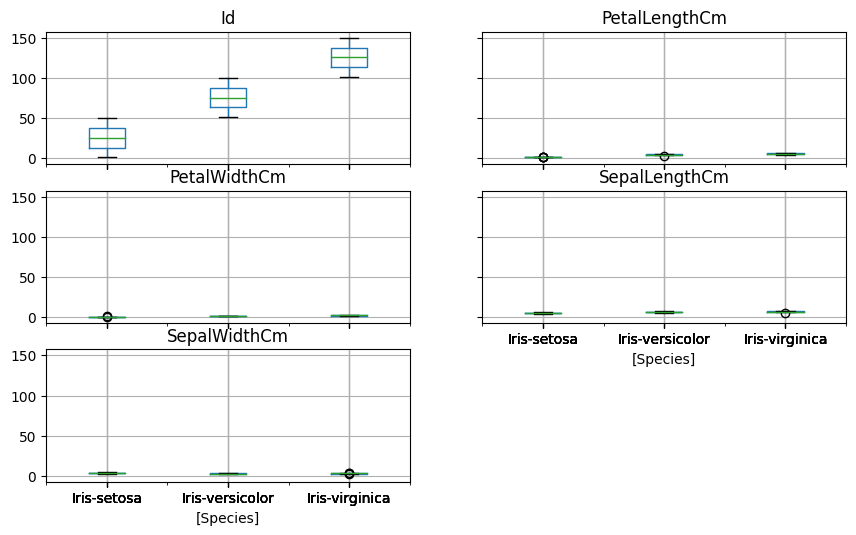

In [ ]:
df.boxplot (by='Species', figsize=(10,6))
plt.title("Boxplot of Iris Dataset Features by Species")
plt.suptitle("")
# Removing default title
plt.xticks (rotation=45)
#Rotate x-axis labels for better readability
plt.xlabel('Species')
plt.ylabel('Measurement')
plt.tight_layout
plt.show()